F74076027 林政傑

# Electrical Grid Stability Simulated Data Data Set

此資料集是分析一個四節點的分散式電網的穩定性，一個電源供應節點(發電廠)、三個用電節點，資料集中各個欄位的意義是參考論文 [Taming instabilities in power grid networks by
decentralized control
](https://link.springer.com/content/pdf/10.1140/epjst/e2015-50136-y.pdf) 所設計的

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 載入資料

- tau1 ~ tau4: 各個節點適應系統的反應時間 (τ)，tau1 為電源供應節點

- p1 ~ p4:     各個節點的用電狀況 (power)，大於 0 代表發電，小於 0 代表耗電，p1 為電源供應節點。

- g1 ~ g4:     跟電價波動有關的參數 (γ)

- stab:        特徵方程根的最大實部，如果為正，則系統線性不穩定

- stabf:       根據 stab 的值填入 stable 或 unstable

In [2]:
data = pd.read_csv('Data_for_UCI_named.csv')
data.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable


查看有無空值

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


將所有資料四捨五入至小數點第 4 位

新增一個欄位，以 1 表示 stable 、 0 表示 unstable

In [4]:
data = round(data, 4)
data['stable'] = data['stab'].apply(lambda x : 0 if x >= 0 else 1)
data.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf,stable
0,2.9591,3.0799,8.3810,9.7808,3.7631,-0.7826,-1.2574,-1.7231,0.6505,0.8596,0.8874,0.9580,0.0553,unstable,0
1,9.3041,4.9025,3.0475,1.3694,5.0678,-1.9401,-1.8727,-1.2550,0.4134,0.8624,0.5621,0.7818,-0.0060,stable,1
2,8.9717,8.8484,3.0465,1.2145,3.4052,-1.2075,-1.2772,-0.9205,0.1630,0.7667,0.8394,0.1099,0.0035,unstable,0


## 定義題目: 

**給定 tau1~ tsu4, p1 ~ p4, g1 ~ g4 ，用分類器預測 stable 值，判斷該列資料是否為穩定的**

## 分析資料

首先可以很明顯發現 p1 = |p2| + |p3| + |p4|

首先觀察 stable 和 unstable 的比例

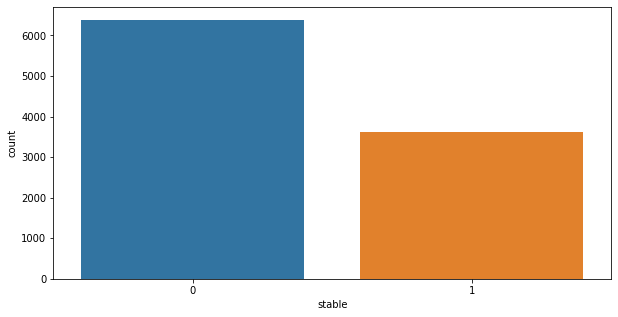

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data['stable'])
plt.show()

觀察 p1 和穩定性的關係

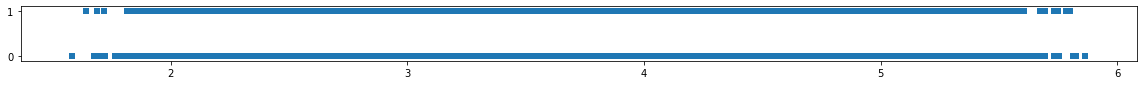

In [6]:
plt.figure(figsize=(20,1))
plt.scatter(data['p1'], data['stable'], marker = ',', lw = 0)

觀察 p1 和 stable 是否有關係，x 軸的單位是 10^-2，以 0.1 為一個區間，y 座標為該區間內的資料數量，然後觀察 p1 的stable 率

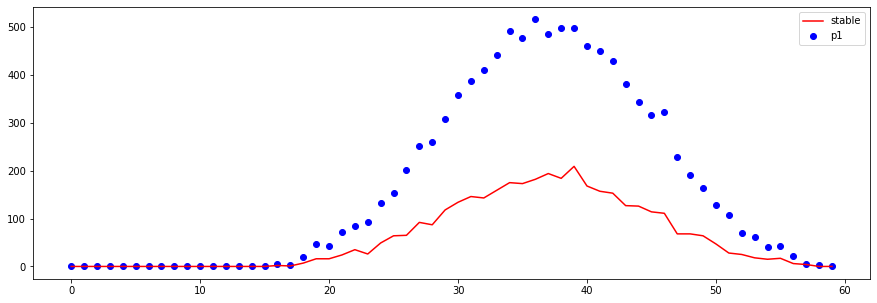

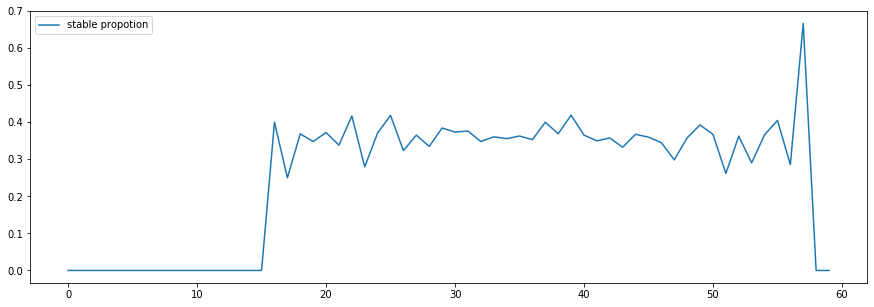

In [7]:
x = range(60)
count = [0] * 60
stable = [0] * 60
for i in range(len(data)):
    index = int(data['p1'][i] // 0.1)
    count[index] = count[index] + 1
    if data['stable'][i] == 1:
        stable[index] = stable[index] + 1

plt.figure(figsize = (15,5))
plt.scatter(x, count, color = 'b', label = 'p1')
plt.plot(x, stable, color = 'r', label = 'stable')
plt.legend()
plt.show()

prop = []
for i in range(60):
    if count[i] != 0:
        prop.append(stable[i] / count[i])
    else:
        prop.append(0)

plt.figure(figsize = (15,5))
plt.plot(x, prop, label = 'stable propotion')
plt.legend()
plt.show()

由上圖只能觀察出 p1 大概在 5.7 到 5.8 之間時， stable 占比會比較高，而其餘 p1 值對應到 stable 等於 1 的只有 35% 左右

所以 p1 很大時 stable 的機會也特別大

觀察 p2 ~ p4 的絕對值和 stable 是否有關係

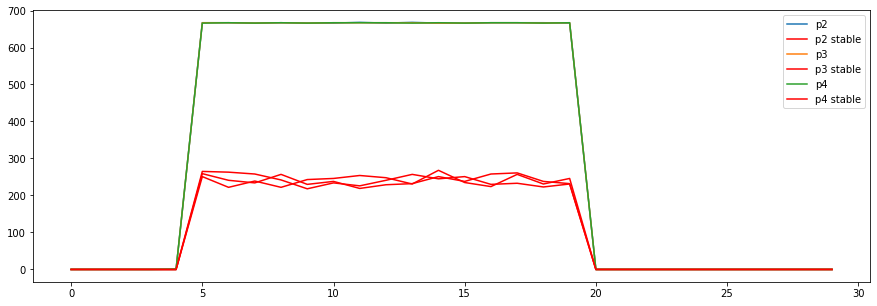

In [8]:
column = ['p2', 'p3', 'p4']
plt.figure(figsize = (15,5))

for col in column:
    x = range(30)
    count = [0] * 30
    stable = [0] * 30
    for i in range(len(data)):
        index = int(abs(data[col][i]) // 0.1)
        count[index] = count[index] + 1
        if data['stable'][i] == 1:
            stable[index] = stable[index] + 1
    plt.plot(x, count, label = col)
    plt.plot(x, stable, color = 'r', label = col + ' stable')
    
plt.legend()    
plt.show()

p2, p3, p4 看起來也跟 stable 沒有明顯的關係

再來觀察 tau 跟 stable 有無關係，先將 tau1 ~ tau4 取平均然後依據 tau 平均由小到大排列

In [9]:
data2 = data.copy()
tau_mean = []
for i in range(len(data2)):
    tau_mean.append(data2['tau1'][i] + data2['tau2'][i] + data2['tau3'][i] + data2['tau4'][i])
    tau_mean[i] = round(tau_mean[i] / 4, 4)
data2['tau_mean'] = tau_mean
data2 = data2.sort_values(['tau_mean'])

接著觀察每一列的 tau mean 跟 stable 的關係，x 軸為 dataframe 的列索引， y 軸為 tau mean 的值或 stable 的值

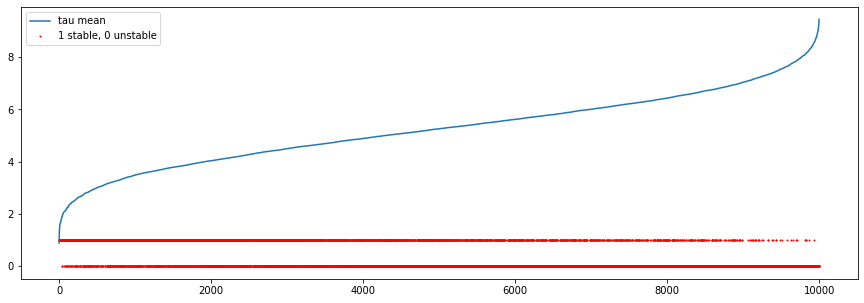

In [10]:
x = range(10000)
plt.figure(figsize = (15,5))
plt.plot(x, data2['tau_mean'], label = 'tau mean')
plt.scatter(x, data2['stable'], color = 'r', s = 1, label = '1 stable, 0 unstable')
plt.legend()
plt.show()

由上面的圖可以看出 tau mean 越高，越不穩定

然後我們畫出另一張圖查看 tau1 ~ tau4 跟 stable 的關係， x 軸為 tau 的值乘以10，y 軸為對應區間的 tau 的數量或 tau 在該區間時 stable 等於 1 的數量

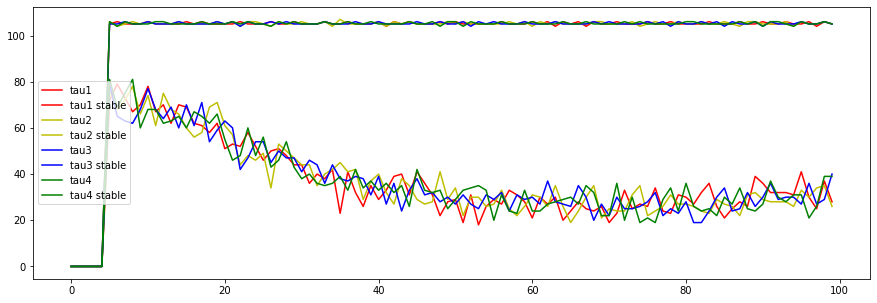

In [11]:
column = ['tau1', 'tau2', 'tau3', 'tau4']
color = {'tau1' : 'r', 'tau2': 'y', 'tau3': 'b', 'tau4': 'g'}
plt.figure(figsize = (15,5))

for col in column:
    x = range(100)
    count = [0] * 100
    stable = [0] * 100
    for i in range(len(data)):
        index = int(data[col][i] // 0.1)
        count[index] = count[index] + 1
        if data['stable'][i] == 1:
            stable[index] = stable[index] + 1
    plt.plot(x, count, color = color[col], label = col)
    plt.plot(x, stable, color = color[col], label = col + ' stable')
    
plt.legend()    
plt.show()

這張圖顯示不論是哪個 tau 值，只要值越高 stable 等於 1 的數量就越低

最後看 g 值跟 stable 的關係， x 軸是 g 值乘上 10^2 ， y 軸是同區間內 g 值的數量 g 或在該區間時 stable 等於 1 的數量

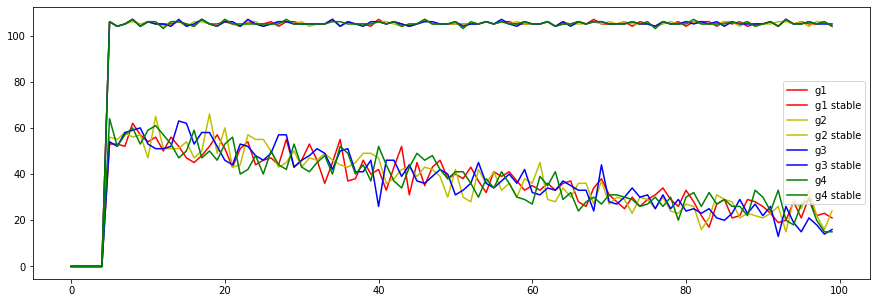

In [12]:
column = ['g1', 'g2', 'g3', 'g4']
color = {'g1' : 'r', 'g2': 'y', 'g3': 'b', 'g4': 'g'}
plt.figure(figsize = (15,5))

for col in column:
    x = range(100)
    count = [0] * 100
    stable = [0] * 100
    for i in range(len(data)):
        index = int(data[col][i] // 0.01)
        count[index] = count[index] + 1
        if data['stable'][i] == 1:
            stable[index] = stable[index] + 1
    plt.plot(x, count, color = color[col], label = col)
    plt.plot(x, stable, color = color[col], label = col + ' stable')
    
plt.legend()    
plt.show()

g 值基本上也是和 tau 呈現類似的趨勢，但是 stable 下降的走勢更接近直線

## 套用模型

由於 tau1~ 4, p1 ~ 4, g1 ~ 4 stable 沒有特別明顯的相關性，只能大略看出除了 p1 以外的資料，都是絕對值越大，越不穩定。而我也沒辦法讀完、讀懂那整篇論文，所以就沒有把這些數據拼湊起來做更深入的分析。在許多資訊不是這麼清楚的狀況下，我選擇使用隨機森林分類器，把這些屬性都納入考慮最後票選出最合適的結果。把 80% 作為 train data ，使用 5 次 kfold 進行驗證

使用 RandomForestClassifier 作為模型，其中有六個參數

- n_estimators: 建立子樹的數量，通常子樹的數量越多，預測結果會更好更穩定，但過多可能會造成 overfitting，同時也會花費比較多運算資源。參考第二次作業使用 500 ，但放入 100, 50, 20 時，平均驗證準確度都介於 0.90 至 0.91 所以就決定了運算量較低的 20

- min_samples_split: 根據屬性劃分節點時，每個劃分最少的樣本數，參考網站使用 12 ，我將其註解後 train accuracy 直接衝上 0.999

- min_samples_leaf: 葉子節點最少的樣本數，參考的網站用 1 ，我直接註解掉

- oob_score: 即是否採用袋外樣本來評估模型的好壞

- random_state: 控制隨機種子，使模型建立的結果可以重複呈現，隨便填了 8

- n_jobs: 使用的 cpu 核心數，-1：cpu 有多少core，就啟動多少 job

In [13]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data_x = data[['tau1', 'tau2', 'tau3',  'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']]
data_y = data['stable']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state = 8)

kf = KFold(n_splits = 5,                              # 設定 K 值
           random_state = 1012,
           shuffle = True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度


for train_index, valid_index in kf.split(train_x):       # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]
    train_y_split = train_y.iloc[train_index]
    valid_x_split = train_x.iloc[valid_index]
    valid_y_split = train_y.iloc[valid_index]
    
    model = RandomForestClassifier(n_estimators = 20,
                             # min_samples_split = ,
                             # min_samples_leaf = ,
                             oob_score = True,
                             random_state = 8,
                             n_jobs = -1) 

    model.fit(train_x_split, train_y_split)
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.9995625
    min train accuracy: 0.99921875
    max train accuracy: 0.99984375
average valid accuracy: 0.9026249999999999
    min valid accuracy: 0.891875
    max valid accuracy: 0.91


最後預測剩下的 20 % test data

In [14]:
model = RandomForestClassifier(n_estimators = 20,
                             # min_samples_split = ,
                             # min_samples_leaf = ,
                             oob_score = True,
                             random_state = 8,
                             n_jobs = -1) 

model.fit(train_x, train_y)
pred = model.predict(test_x)
print("正確率: %.4f" %  accuracy_score(pred, test_y))

正確率: 0.8895
